In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
demo=pd.read_csv("demographics.csv")

## Data Cleaning

In [103]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4863 non-null   object 
 1   First Name      4861 non-null   object 
 2   Monthly Income  141 non-null    float64
 3   Pets            4863 non-null   object 
 4   Date of Birth   4863 non-null   object 
 5   Market          4863 non-null   object 
 6   State           4863 non-null   object 
dtypes: float64(1), object(6)
memory usage: 266.1+ KB


In [ ]:
#Calculate age of the person using today's date
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

demo['Age']= demo['Date of Birth'].apply(age)

In [112]:
#Look for outliers in age, which signals dirty data and further data cleaning
demo['Age'].describe()


count    4863.000000
mean       10.582768
std         8.614540
min      -185.000000
25%         5.000000
50%         9.000000
75%        14.000000
max       116.000000
Name: Age, dtype: float64

In [113]:
demo[demo['Age']== -185]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,Age
585,u3oms3hqg1orep1s,Kyara,NaN,Yes,2206-07-31,Southwest,AZ,-185


In [119]:
# Check on the age outliers
demo[demo['Age']== 116]

# We see the issue of duplicate records

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,Age
2010,9p197dbbnq5p0om4,Chouida,NaN,No,1905-11-14,Bay Area,CA,116
2806,9p197dbbnq5p0om4,Chouida,10000.0,No,1905-11-14,Bay Area,CA,116


In [128]:
demo = demo.drop(demo.index[[585,2010,2806]])  
# We are not sure if the real year is 2006 or 2016 unless we reach out for other parties to verify this information.
# Given that we have a large dataset already, we will remove this outlier and continue our analysis

In [129]:
demo.iloc[582:587,]
# checking if line removal is successful 

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,Age
582,imfrlgbu6i1jouup,Tiffany,NaN,No,2018-04-24,Bay Area,CA,3
583,kvl9576e1kkqukls,Alyssa,NaN,No,2011-02-01,Southwest,AZ,11
584,fimj5rffojq51sre,Jose,NaN,No,2018-09-24,SoCal,CA,3
586,kee2eat318q5hj6p,Jayson,NaN,No,2005-09-08,East,NC,16
587,9fh3uokqbo1joebh,Jayleen,NaN,No,2015-08-26,Washington,WA,6


In [130]:
demo = demo[demo.duplicated()==False]
#cleared ducplicates

In [131]:
#summary statistics of income and age
demo.describe()

,Monthly Income,Age
count,140.000000,4814.000000
mean,4044.821357,10.576859
std,7321.272637,7.815250
min,0.000000,0.000000
25%,1612.500000,5.000000
50%,2500.000000,9.000000
75%,4374.750000,14.000000
max,60000.000000,79.000000


In [132]:
demo['First Name']=demo['First Name'].astype('str')

## Resident population

In [133]:
#Crafted identifier function to estimate gender using first name only
def gender_identifier(name):
    if (name[-1]=='a') or (name[-1]=='e') or (name[-1]=='i') or (name[-1]=='h') or (name[-1]=='l') or (name[-1]=='y') :
        return "Female"    
    return "Male" 

demo['Gender']=demo['First Name'].apply(gender_identifier)
    

In [145]:
female_frac = demo[demo['Gender']=='Female']['ID'].count() / demo['Gender'].count()

In [146]:
female_frac

0.5496468633153303

In [147]:
male_frac = demo[demo['Gender']=='Male']['ID'].count() / demo['Gender'].count()

In [148]:
male_frac

0.4503531366846697

In [183]:
no_children = demo[ demo['Age']>13 ]['ID'].count() / demo['ID'].count()
no_children

0.2904029912754466

In [232]:
def children(age):
    if age > 13:
        return "No"
    return "Yes"

demo['Children'] = demo['Age'].apply(children)

In [238]:
p = demo.groupby(['Children','Gender'])['ID'].count().reset_index() 
p['Percentage']= 100 * p['ID']  / p['ID'].sum()
p

,Children,Gender,ID,Percentage
0,No,Female,780,16.202742
1,No,Male,618,12.837557
2,Yes,Female,1866,38.761944
3,Yes,Male,1550,32.197757


## Age distribution

In [295]:
#examine distribution of age by gender
demo[(demo['Age']>=0) & (demo['Age']<=1)].groupby(['Gender'])['ID'].count()

Gender
Female    140
Male       98
Name: ID, dtype: int64

In [184]:
demo.groupby(['Age'])['ID'].count()

Age
0      58
1     180
2     227
3     253
4     271
     ... 
71      1
72      2
73      2
78      1
79      1
Name: ID, Length: 65, dtype: int64

In [189]:
v = demo.groupby(['Age'])['ID'].count()
v.describe()

count     65.000000
mean      74.061538
std      107.999693
min        1.000000
25%        2.000000
50%        9.000000
75%      180.000000
max      303.000000
Name: ID, dtype: float64

In [209]:
demo.groupby(['Age'])['ID'].count()[:20]

Age
0      58
1     180
2     227
3     253
4     271
5     294
6     285
7     303
8     274
9     271
10    246
11    244
12    232
13    278
14    249
15    216
16    192
17    198
18    151
19     78
Name: ID, dtype: int64

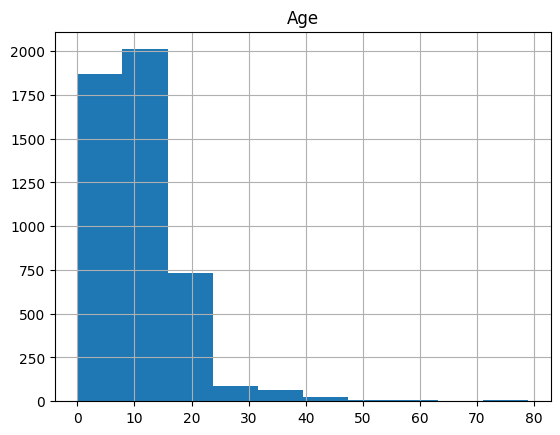

In [206]:
#plot histogram to visualize most populat ages
demo.hist(column='Age')
plt.show()

In [216]:
def agegrp(age):
    if age <=4 :
        return "0-4"
    elif (age >= 5) & ( age <= 12 ):
        return "5-12"
    elif (age >=13 ) & ( age <= 18) :
        return "13-18"
    elif (age >=19 )& ( age <= 26) :
        return "19-26"
    elif (age >=27 )& ( age <= 36) :
        return "27-36"
    elif (age >=37 )& ( age <= 46) :
        return "37-46"
    elif (age >=47 )& ( age <= 56) :
        return "47-56"
    elif (age >=57 )& ( age <= 64) :
        return "57-64"
    return "65+"

demo['Age group']=demo['Age'].apply(agegrp)


In [230]:
demo.groupby(['Age group','Gender'])['ID'].count()

Age group  Gender
0-4        Female     552
           Male       437
13-18      Female     708
           Male       576
19-26      Female     136
           Male        99
27-36      Female      43
           Male        42
37-46      Female      26
           Male        18
47-56      Female       9
           Male         3
5-12       Female    1159
           Male       990
57-64      Female       4
           Male         2
65+        Female       9
           Male         1
Name: ID, dtype: int64

In [272]:
kids= demo[ demo['Age']==7 ]
k = kids.groupby('State')['ID'].count().reset_index() 
k['Percentage']= 100 * k['ID']  / k['ID'].sum()
k

,State,ID,Percentage
0,AL,6,1.980198
1,AZ,45,14.851485
2,CA,77,25.412541
3,CO,3,0.990099
4,FL,3,0.990099
5,GA,25,8.250825
6,MS,3,0.990099
7,NC,32,10.561056
8,NV,29,9.570957
9,OR,4,1.320132


In [348]:
demo[demo['Age']==79]

,ID,First Name,Monthly Income,Pets,Date of Birth,Market,State,Age,Gender,Age group,Children
4071,dg00cdau1tt4bot5,Oliva,5000.0,No,1942-04-29,SoCal,CA,79,Female,65+,No


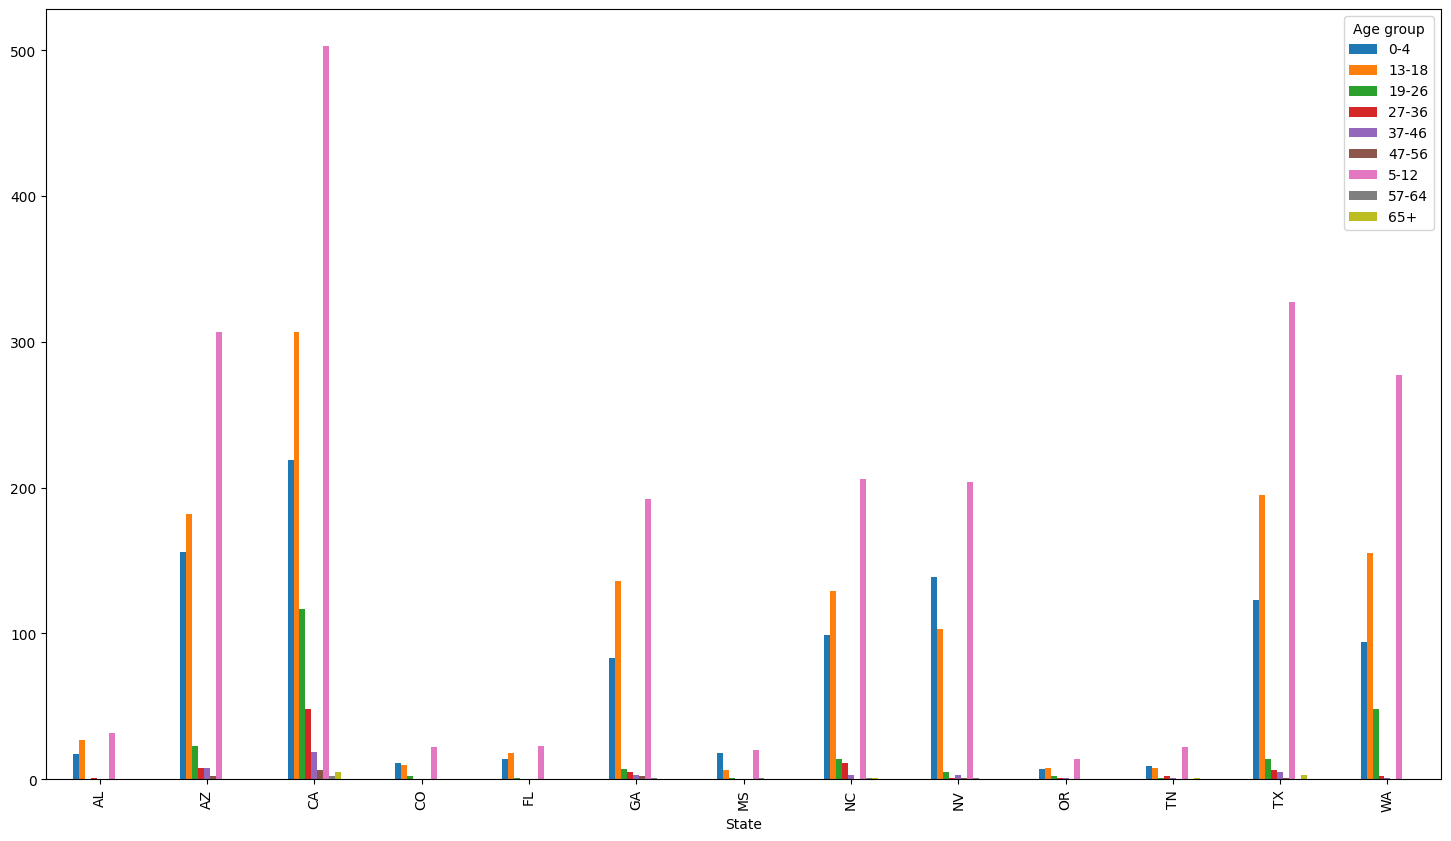

In [374]:
da= demo.groupby(['State', 'Age group']).size().unstack(level=1)
da.plot(kind = 'bar', figsize=[18,10])
plt.show()

## Income Distribution

In [177]:
demo.groupby(['Gender'])['Monthly Income'].sum()

Gender
Female    289141.77
Male      277133.22
Name: Monthly Income, dtype: float64

In [181]:
#average money a woman makes
demo[demo['Gender']=='Female']['Monthly Income'].sum()/demo[demo['Gender']=='Female'].count()[2]

3755.0879220779225

In [182]:
#average money a man makes
demo[demo['Gender']=='Male']['Monthly Income'].sum()/demo[demo['Gender']=='Male'].count()[2]

4398.94

In [244]:
demo.groupby(['Children'])['Monthly Income'].agg('mean')

Children
No     3092.674419
Yes    4466.907113
Name: Monthly Income, dtype: float64

In [174]:
income=demo[demo['Monthly Income'].notnull()].groupby(['Age'])['Monthly Income'].sum()
income

Age
3      10130.36
4      35956.39
5      53525.00
6      19764.66
7      36782.39
8      77551.00
9      25324.36
10     26983.08
11     14623.36
12    105892.00
13     26757.39
14     26126.00
15     20800.00
16      8500.00
17       801.00
18     18320.00
19      4166.00
20     25580.00
21     20558.00
27      2160.00
73       974.00
79      5000.00
Name: Monthly Income, dtype: float64

In [229]:
kids.groupby(['Gender'])['ID'].count()

Gender
Female    1783
Male      1463
Name: ID, dtype: int64

In [195]:
total_rows = demo.count()  #4814

In [266]:
demo.groupby(['Market'])['Age'].max()

Market
Bay Area      73
Central       78
East          72
Sacramento    44
SoCal         79
Southwest     63
Washington    41
Name: Age, dtype: int64

In [258]:
demo.groupby(['Market','State'])['ID'].count()

Market      State
Bay Area    CA       482
Central     TX       674
East        AL        77
            FL        56
            GA       429
            MS        46
            NC       464
            TN        44
Sacramento  CA       340
SoCal       CA       404
Southwest   AZ       686
            CO        45
            NV       457
Washington  OR        33
            WA       577
Name: ID, dtype: int64

In [259]:
demo.groupby(['Market'])['ID'].count()

Market
Bay Area       482
Central        674
East          1116
Sacramento     340
SoCal          404
Southwest     1188
Washington     610
Name: ID, dtype: int64

In [267]:
demo.groupby(['State'])['Age'].mean()     #average age for all states

State
AL     9.948052
AZ    10.061224
CA    12.060359
CO     9.244444
FL     9.232143
GA    10.349650
MS     8.043478
NC    10.497845
NV     8.560175
OR    11.545455
TN    12.318182
TX    10.369436
WA    10.441941
Name: Age, dtype: float64

In [372]:
demo.groupby(['State'])['Age'].median()    #median age for all states

State
AL    11.0
AZ     9.0
CA    10.0
CO     9.0
FL     9.0
GA    10.0
MS     6.0
NC    10.0
NV     7.0
OR    10.0
TN    10.5
TX    10.0
WA    10.0
Name: Age, dtype: float64

In [170]:
With_pets = demo[demo['Pets']=='Yes']['ID'].count() / demo['ID'].count()
With_pets

0.23431657665143332

In [299]:
pet_market = demo[demo['Pets']=='Yes'].groupby(['Market'])['ID'].count() / demo.groupby(['Market'])['ID'].count()
pet_market*100

Market
Bay Area      19.917012
Central       24.777448
East          25.000000
Sacramento    24.411765
SoCal         23.762376
Southwest     22.727273
Washington    22.459016
Name: ID, dtype: float64

In [335]:
demo.groupby(['State'])['Monthly Income'].sum()   #not informative and inclusive because we only have 100 lines of income data

State
AL         0.00
AZ      8470.08
CA    519801.91
CO         0.00
FL         0.00
GA         0.00
MS         0.00
NC         0.00
NV         0.00
OR     36000.00
TN         0.00
TX         0.00
WA      2003.00
Name: Monthly Income, dtype: float64

In [168]:
total_count = demo.groupby(['Age'])['ID'].count() 
Has_pets = demo[demo["Pets"]=="Yes"].groupby(['Age'])['ID'].count()
percentage1 = Has_pets/total_count
percentage1.sort_values(ascending = False)[lambda x: x <1]

Age
25    0.500000
63    0.500000
58    0.500000
54    0.500000
36    0.500000
26    0.421053
23    0.388889
21    0.363636
18    0.337748
29    0.333333
32    0.333333
22    0.333333
31    0.333333
16    0.333333
17    0.323232
24    0.285714
13    0.276978
34    0.272727
12    0.267241
14    0.261044
15    0.259259
7     0.257426
33    0.250000
3     0.229249
0     0.224138
1     0.216667
10    0.211382
9     0.210332
11    0.209016
8     0.208029
35    0.200000
38    0.200000
5     0.190476
30    0.181818
2     0.176211
6     0.171930
20    0.166667
27    0.166667
19    0.166667
4     0.154982
43    0.142857
39    0.125000
Name: ID, dtype: float64

## Marketing Campaign - finding target personas 

In [301]:
#create a subset of the data where we fix our eyes on pet owners 
Animal = demo[demo['Pets']=='Yes']
total = Animal.count()[0]

In [315]:
#investigate breakdown by gender from all pet owners
Animal.groupby(['Gender'])['ID'].count()

Gender
Female    629
Male      499
Name: ID, dtype: int64

In [310]:
#breakdown by age
byage =Animal.groupby(['Age group'])['ID'].count()/total*100
byage

Age group
0-4      17.021277
13-18    33.421986
19-26     5.496454
27-36     1.773050
37-46     0.620567
47-56     0.443262
5-12     40.957447
57-64     0.177305
65+       0.088652
Name: ID, dtype: float64

In [311]:
#Investigate the impact of having a children in the family to being a pet owner
byhouse =Animal.groupby(['Children'])['ID'].count()/total*100
byhouse

Children
No     35.195035
Yes    64.804965
Name: ID, dtype: float64

In [333]:
#Breakdown by market and state
Animal.groupby(['Market','State'])['ID'].count()

Market      State
Bay Area    CA        96
Central     TX       167
East        AL        24
            FL        22
            GA        69
            MS         2
            NC       156
            TN         6
Sacramento  CA        83
SoCal       CA        96
Southwest   AZ       178
            CO        11
            NV        81
Washington  OR        21
            WA       116
Name: ID, dtype: int64

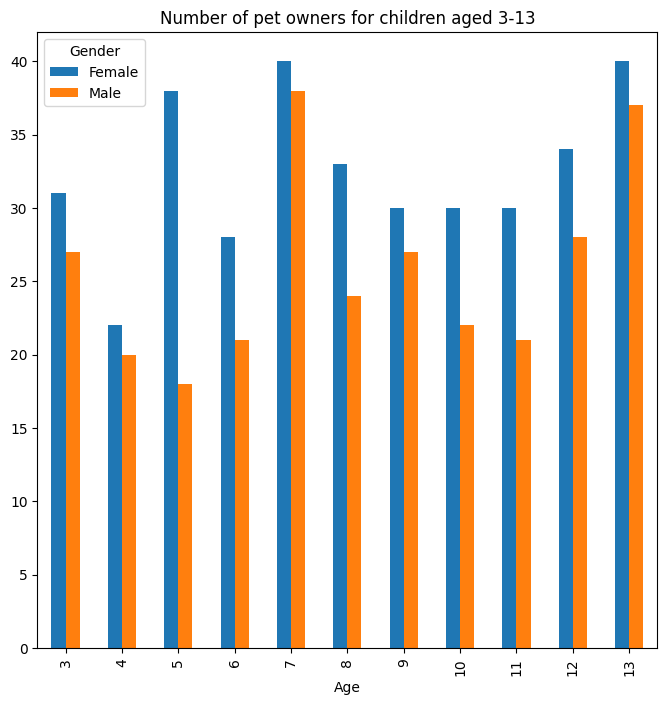

In [384]:
fig1 = Animal[(Animal['Age']<= 13)&(Animal['Age']>=3)].groupby(['Age','Gender']).size().unstack(level=1)
fig1.plot(kind="bar", title="Number of pet owners for children aged 3-13", figsize=[8,8])
plt.show()

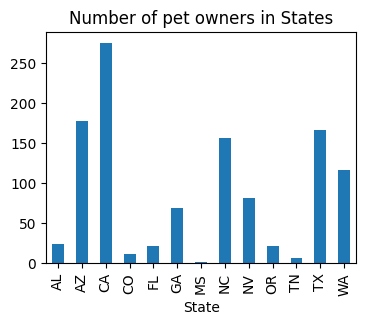

In [359]:
fig2 = Animal.groupby(['State'])['ID'].count()
fig2.plot(kind="bar", title="Number of pet owners in States", figsize=[4,3])
plt.show()

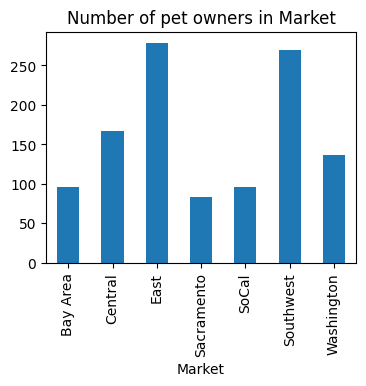

In [361]:
pm = Animal.groupby(['Market'])['ID'].count()
pm.plot(kind="bar", title="Number of pet owners in Market", figsize=[4,3])
plt.show()

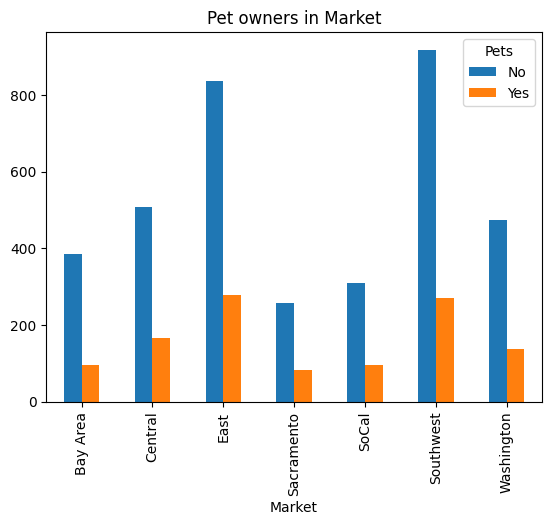

In [362]:
demo_gb = demo.groupby(['Market', 'Pets']).size().unstack(level=1)
demo_gb.plot(kind = 'bar',title="Pet owners in Market")
plt.show()

In [327]:
#Find top age group and state with pets in the market of interest
Animal[(Animal['Age'] <=18 )&(Animal['Age']>=5)& (Animal['Gender']=='Female')& (Animal['Market']=='Central')] .groupby(['Age','State'])['ID'].count().sort_values(ascending=False)[:1]

Age  State
17   TX       8
Name: ID, dtype: int64

In [395]:
#Find top three ages of children in a family with pet in Arizona. 
az = Animal[Animal['State']=='AZ'].groupby('Age')['ID'].count().sort_values(ascending=False)[:3]
az

Age
7     15
8     13
16    11
Name: ID, dtype: int64

In [394]:
nc = Animal[Animal['State']=='NC'].groupby(['Age'])['ID'].count().sort_values(ascending=False)[:3]
nc

Age
7     14
14    12
9     11
Name: ID, dtype: int64

In [396]:
ca = Animal[Animal['State']=='CA'].groupby(['Age'])['ID'].count().sort_values(ascending=False)[:3]
ca

Age
13    20
7     19
3     15
Name: ID, dtype: int64